In [1]:
#Import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API 

In [3]:
#Read the files

In [4]:
df = pd.read_csv('train.csv')
labels = pd.read_csv('labels.csv')

In [5]:
#EDA

In [6]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [8]:
temp = pd.concat([df,labels],axis=1)

In [10]:
temp.corr()['In-hospital_death'].sort_values()

GCS                 -0.254104
HCO3                -0.129574
Albumin             -0.126925
Urine               -0.120881
NIDiasABP           -0.080454
NIMAP               -0.078995
PaCO2               -0.075550
Temp                -0.059519
SaO2                -0.056530
Weight              -0.054443
NISysABP            -0.052866
DiasABP             -0.050506
SysABP              -0.047688
MAP                 -0.022010
Platelets           -0.020178
Height              -0.012456
RecordID            -0.011570
FiO2                -0.010986
HCT                 -0.009584
Cholesterol         -0.008578
PaO2                -0.008070
Gender              -0.006346
ICUType             -0.006314
K                    0.018713
Na                   0.021979
pH                   0.024961
RespRate             0.031718
TroponinT            0.034866
TroponinI            0.053133
Mg                   0.061766
ALT                  0.070992
HR                   0.073561
WBC                  0.094936
Glucose   

In [11]:
temp = temp.drop(['MechVent','RecordID','Gender','Height'],axis=1)

In [12]:
temp.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [16]:
temp = temp.drop('ICUType',axis=1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()

In [17]:
#Splitting the data

In [19]:
X = temp.drop('In-hospital_death',axis=1).values

In [20]:
y = temp['In-hospital_death'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [24]:
#Building the model

In [25]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import Dense, Dropout

In [27]:
model = Sequential()

In [53]:
model.add(Dense(units=37,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=18,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=9,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy')

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [54]:
model.fit(x=X_train,y=y_train,epochs=10,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 2799 samples, validate on 1200 samples
Epoch 1/10
2799/2799 [==============================] - 1s 336us/sample - loss: 0.6219 - val_loss: 0.4507
Epoch 2/10
2799/2799 [==============================] - 0s 109us/sample - loss: 0.4864 - val_loss: 0.3876
Epoch 3/10
2799/2799 [==============================] - 0s 105us/sample - loss: 0.4571 - val_loss: 0.3696
Epoch 4/10
2799/2799 [==============================] - 0s 98us/sample - loss: 0.4474 - val_loss: 0.3743
Epoch 5/10
2799/2799 [==============================] - 0s 105us/sample - loss: 0.4163 - val_loss: 0.3397
Epoch 6/10
2799/2799 [==============================] - 0s 108us/sample - loss: 0.4045 - val_loss: 0.3438
Epoch 7/10
2799/2799 [==============================] - 0s 96us/sample - loss: 0.4003 - val_loss: 0.3259
Epoch 8/10
2799/2799 [==============================] - 0s 91us/sample - loss: 0.3972 - val_loss: 0.3312
Epoch 9/10
2799/2799 [==============================] - 0s 129us/sample - loss: 0.3794 - val_loss: 0.3243
E

In [57]:
preds = model.predict_classes(X_test)

In [36]:
#Check

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
preds

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

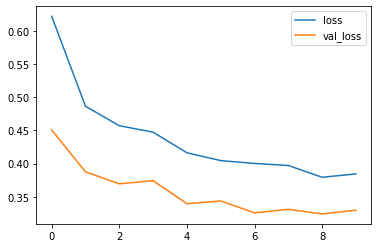

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [60]:
print(accuracy_score(y_test, preds))

0.8725
